<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18412\464808635.py:9: SyntaxWarning: invalid escape sequence '\c'
  orignal_img=cv2.imread('D:\coins.png')


số lượng đối tượng có trong ảnh là 9


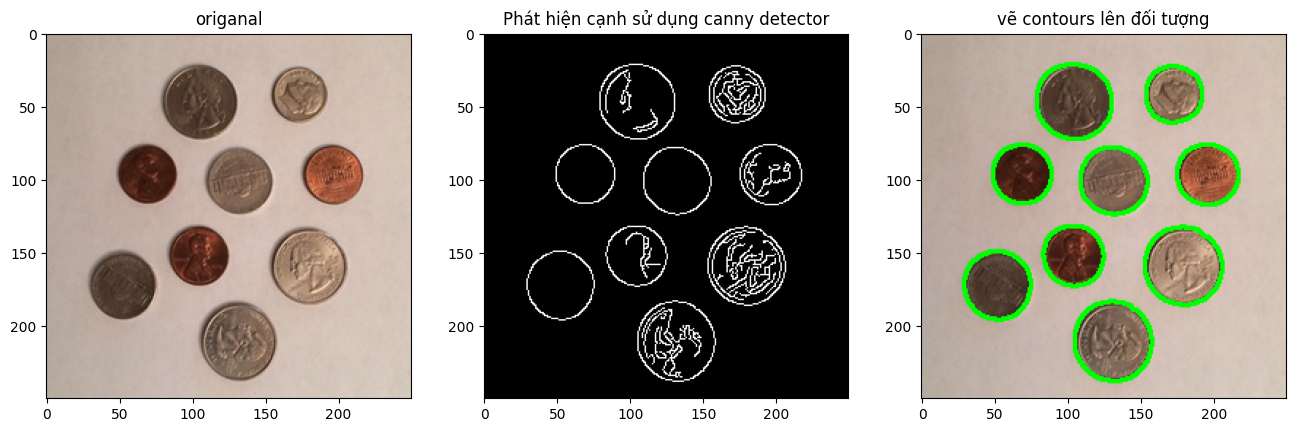

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def canny_edge_detection(img, threshold1, threshold2):
    image = cv2.GaussianBlur(img, (5, 5), 0)
    canny = cv2.Canny(image, threshold1, threshold2)
    return canny
if __name__=='__main__':
    orignal_img=cv2.imread('D:\coins.png')
    assert orignal_img is not None, "file could not be read, check with os.path.exists()"
    orignal_img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2RGB)
    img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2GRAY)
    edged = canny_edge_detection(img, 30, 150)
    contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    print(f"số lượng đối tượng có trong ảnh là {len(contours)}")
    coins=orignal_img.copy()
    cv2.drawContours(coins,contours, -1, (0,255,0), 2)
    fig=plt.figure(figsize=(16,9))
    ax1,ax2, ax3=fig.subplots(1,3)
    ax1.imshow(orignal_img)
    ax1.set_title("origanal")

    ax2.imshow(edged, cmap='gray')
    ax2.set_title("Phát hiện cạnh sử dụng canny detector")

    ax3.imshow(coins)
    ax3.set_title("vẽ contours lên đối tượng")
    plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\c'
<>:27: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18412\328382139.py:27: SyntaxWarning: invalid escape sequence '\c'
  orignal_img=cv2.imread('D:\coins.png')


số lượng đối tượng trong ảnh là 9


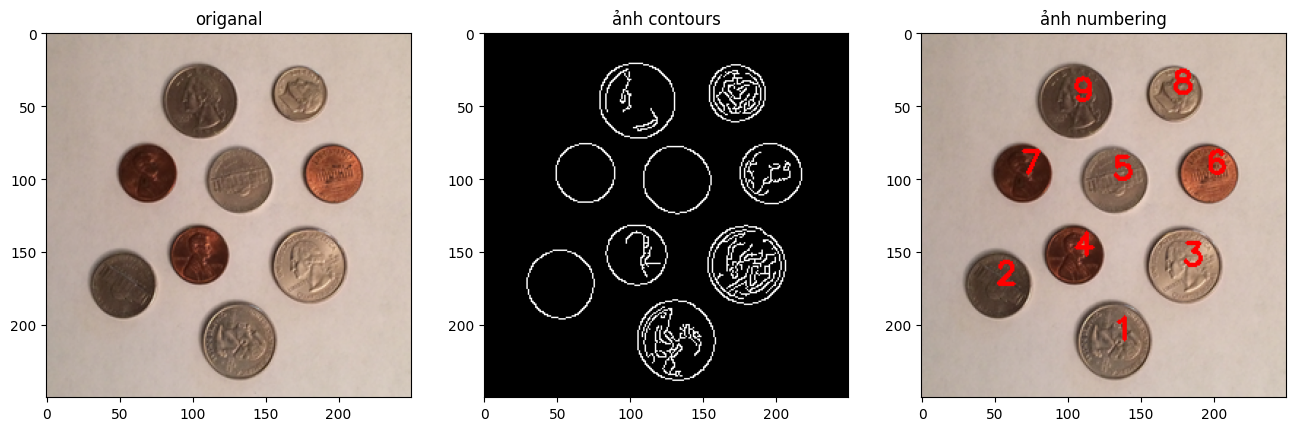

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def canny_edge_detection(img, threshold1, threshold2):
    image = cv2.GaussianBlur(img, (5, 5), 0)
    canny = cv2.Canny(image, threshold1, threshold2)
    return canny
def centroid_objects(contours):
    number_of_contour=len(contours)
    list_of_centroid = [[0,0] for _ in range(number_of_contour)]
    for i in range(number_of_contour):
        M=cv2.moments(contours[i])
        cx = int(M['m10']/M['m00']) 
        cy = int(M['m01']/M['m00']) 
        list_of_centroid[i][0]=cx
        list_of_centroid[i][1]=cy
    return list_of_centroid

def draw_numbering_of_object(image, centroids):
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.7
    color = (255, 0, 0)
    for i in range(len(centroids)):
        cv2.putText(image, str(i+1), (centroids[i][0], centroids[i][1]), font, scale, color, thickness=2)
    return image
if __name__=='__main__':
    orignal_img=cv2.imread('D:\coins.png')
    assert orignal_img is not None, "file could not be read, check with os.path.exists()"
    orignal_img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2RGB)
    img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2GRAY)
    edged = canny_edge_detection(img, 30, 150)
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    number_of_contour=len(contours)
    print(f"số lượng đối tượng trong ảnh là {number_of_contour}")
    centroids= centroid_objects(contours)
    img_numbering= draw_numbering_of_object(orignal_img.copy(),centroids) 
    fig=plt.figure(figsize=(16,9))
    ax1,ax2,ax3=fig.subplots(1,3)
    ax1.imshow(orignal_img)
    ax1.set_title("origanal")
    ax2.imshow(edged, cmap="gray")
    ax2.set_title("ảnh contours")
    ax3.imshow(img_numbering)
    ax3.set_title("ảnh numbering")
    plt.show()

<>:36: SyntaxWarning: invalid escape sequence '\c'
<>:36: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18412\897152183.py:36: SyntaxWarning: invalid escape sequence '\c'
  orignal_img=cv2.imread('D:\coins.png')


số lượng đối tượng có trong ảnh là 9


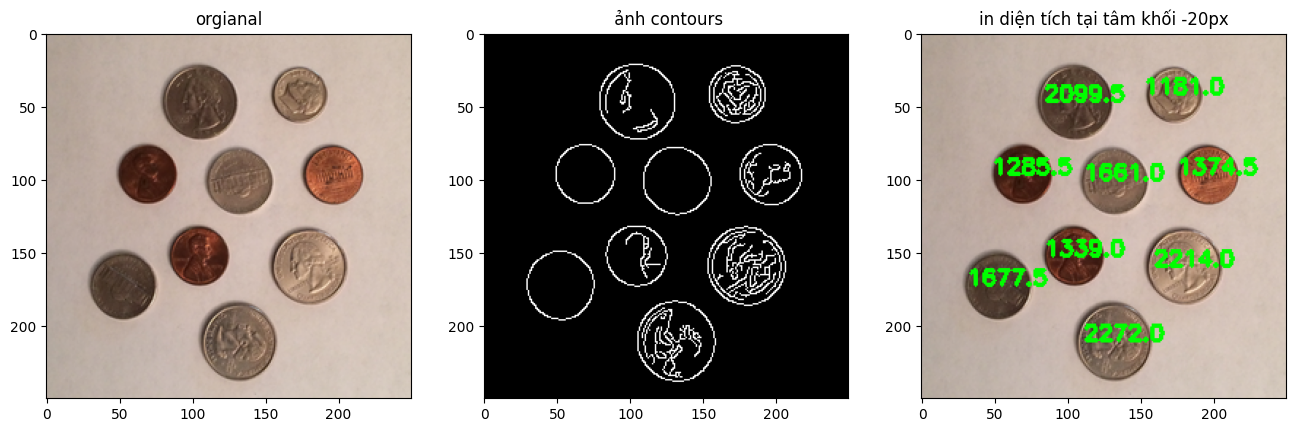

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def canny_edge_detection(img, threshold1, threshold2):
    image = cv2.GaussianBlur(img, (5, 5), 0)
    canny = cv2.Canny(image, threshold1, threshold2)
    return canny
def centroid_objects(cnts):
    number_of_contour=len(cnts)
    list_of_centroid = [[0,0] for _ in range(number_of_contour)]
    for i in range(number_of_contour):
        M=cv2.moments(cnts[i])
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        list_of_centroid[i][0]=cx
        list_of_centroid[i][1]=cy
    return list_of_centroid
def area_objects(cnts):
    list_of_area=[cv2.contourArea(i) for i in cnts]
    return list_of_area
def draw_numbering_of_object(image, centroids):
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.7
    color = (0, 255, 0)
    for i in range(len(centroids)):
        cv2.putText(image, str(i+1), (centroids[i][0], centroids[i][1]), font, scale, color, thickness=2)
    return image
def print_area_of_object(image, centroids, areas):
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.5
    color = (0, 255, 0)
    for i in range(len(centroids)):
        cv2.putText(image, str(areas[i]), (centroids[i][0]-20, centroids[i][1]), font, scale, color, thickness=2)
    return image
if __name__=='__main__':
    orignal_img=cv2.imread('D:\coins.png')
    assert orignal_img is not None, "file could not be read, check with os.path.exists()"
    orignal_img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2RGB)
    img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2GRAY)
    edged = canny_edge_detection(img, 30, 150)
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    number_of_contour=len(contours)
    print(f"số lượng đối tượng có trong ảnh là {number_of_contour}")
    centroids= centroid_objects(contours)
    areas=area_objects(contours)
    img_printarea=print_area_of_object(orignal_img.copy(),centroids, areas)
    fig=plt.figure(figsize=(16,9))
    ax1,ax2,ax3=fig.subplots(1,3)
    ax1.imshow(orignal_img)
    ax1.set_title("orgianal")
    ax2.imshow(edged, cmap="gray")
    ax2.set_title(" ảnh contours")
    ax3.imshow(img_printarea)
    ax3.set_title("in diện tích tại tâm khối -20px",)
    plt.show()

<>:41: SyntaxWarning: invalid escape sequence '\c'
<>:41: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Admin\AppData\Local\Temp\ipykernel_18412\3132986857.py:41: SyntaxWarning: invalid escape sequence '\c'
  orignal_img=cv2.imread('D:\coins.png')


số lượng đối tượng có trong ảnh là 9


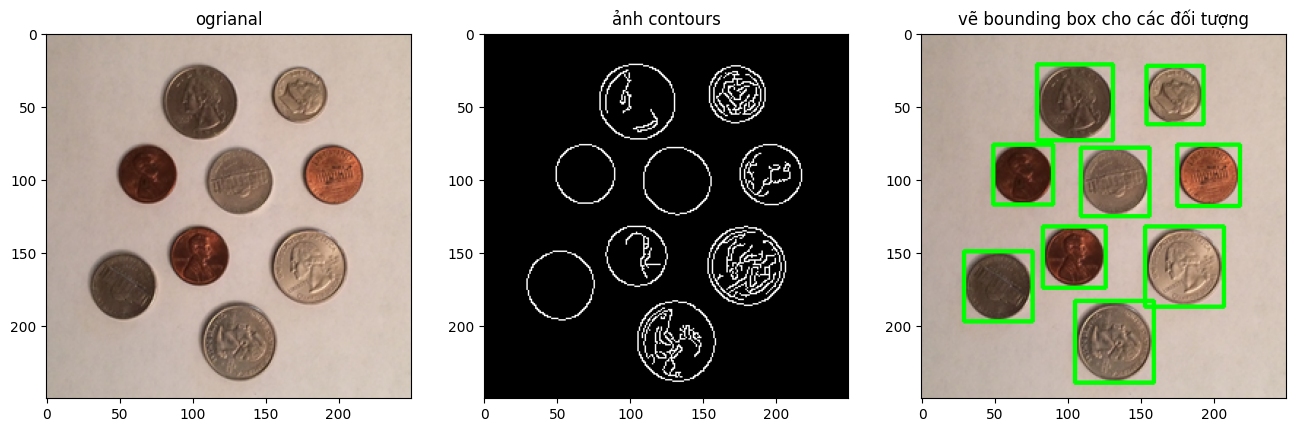

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def canny_edge_detection(img, threshold1, threshold2):
    image = cv2.GaussianBlur(img, (5, 5), 0)
    canny = cv2.Canny(image, threshold1, threshold2)
    return canny
def centroid_objects(cnts):
    number_of_contour=len(cnts)
    list_of_centroid = [[0,0] for _ in range(number_of_contour)]
    for i in range(number_of_contour):
        M=cv2.moments(cnts[i])
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        list_of_centroid[i][0]=cx
        list_of_centroid[i][1]=cy
    return list_of_centroid
def area_objects(cnts):
    list_of_area=[cv2.contourArea(i) for i in cnts]
    return list_of_area
def draw_numbering_of_object(image, centroids):
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.7
    color = (0, 255, 0) 
    for i in range(len(centroids)):
        cv2.putText(image, str(i+1), (centroids[i][0], centroids[i][1]), font, scale, color, thickness=2)
    return image
def print_area_of_object(image, centroids, areas):
    font = cv2.FONT_HERSHEY_SIMPLEX
    scale = 0.5
    color = (0, 255, 0) 
    for i in range(len(centroids)):
        cv2.putText(image, str(areas[i]), (centroids[i][0]-20, centroids[i][1]), font, scale, color, thickness=2)
    return image
def draw_bounding_box(image,cnts):
    for i in cnts:
        x,y,w,h=cv2.boundingRect(i)
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    return image
if __name__=='__main__':
    orignal_img=cv2.imread('D:\coins.png')
    assert orignal_img is not None, "file could not be read, check with os.path.exists()"
    orignal_img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2RGB)
    img=cv2.cvtColor(orignal_img,cv2.COLOR_BGR2GRAY)
    edged = canny_edge_detection(img, 30, 150)
    contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    number_of_contour=len(contours)
    print(f"số lượng đối tượng có trong ảnh là {number_of_contour}")
    bounding_box=draw_bounding_box(orignal_img.copy(),contours)
    fig=plt.figure(figsize=(16,9))
    ax1,ax2,ax3=fig.subplots(1,3)
    ax1.imshow(orignal_img)
    ax1.set_title("ogrianal")
    ax2.imshow(edged, cmap="gray")
    ax2.set_title("ảnh contours")
    ax3.imshow(bounding_box)
    ax3.set_title("vẽ bounding box cho các đối tượng",)
    plt.show()